# NLP Basics: Reading in text data & why do we need to clean the text?

### Read in semi-structured text data

In [1]:
# Read in the raw text
rawData = open("SMSSpamCollection.tsv").read()

# Print the raw data
rawData[0:500]  #Print first 500 characters

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [2]:
parsed_Data= rawData.replace('\t', '\n').split('\n')   #The split function will chop off the \n

In [3]:
parsed_Data[0:500]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham',
 "Nah I don't think he goes to usf, he lives around here though",
 'ham',
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 'ham',
 'I HAVE A DATE ON SUNDAY WITH WILL!!',
 'ham',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'spam',
 'WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'spam',
 'Had your mobile 11 months or more? U R entitled to Upd

In [4]:
label_list=parsed_Data[0::2]
text_list=parsed_Data[1::2]

In [5]:
print(label_list[0:5])
print(text_list[0:5])

['ham', 'spam', 'ham', 'ham', 'ham']
["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though", 'Even my brother is not like to speak with me. They treat me like aids patent.', 'I HAVE A DATE ON SUNDAY WITH WILL!!']


In [7]:
print(len(label_list))
print(len(text_list))

5571
5570


Let's see what is one extra item in label_list

In [8]:
print(label_list[-5:])

['ham', 'ham', 'ham', 'ham', '']


In [9]:
fullCorpus= pd.DataFrame({
    'label':label_list[:-1],
    'body_list': text_list
})

In [10]:
fullCorpus.head()

,label,body_list
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


However, there is a shortcut using Pandas. The moment wer realised that there is '\t' in our print dataset, we can easily solve this problem using Pandas

In [11]:
data=pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)

In [12]:
data.head()

,0,1
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


crate columns

In [13]:
data.columns=['label', 'body_text']
data.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


<h1> Exploring the dataset
   

In [14]:
data.shape

(5568, 2)

In [15]:
print(len(data[data['label']=='spam'])) 

746


In [16]:
print(len(data[data['label']=='ham'])) 

4822


In [17]:
data['label'].isnull().sum()
data['body_text'].isnull().sum()

0

<h1> Using regular expressions in Python
    

In [18]:
import re

In [19]:
re_test = 'This is a made up string to test 2 different regex methods'
re_test_messy = 'This      is a made up     string to test 2    different regex methods'
re_test_messy1 = 'This-is-a-made/up.string*to>>>>test----2""""""different~regex-methods'

<h3>Splitting sentence into a list of words

In [20]:
re.split('\s', re_test)  #\s stands for a single while space

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [21]:
re.split('\s', re_test_messy)  #Python doesnt know what to do with these white spaces.

['This',
 '',
 '',
 '',
 '',
 '',
 'is',
 'a',
 'made',
 'up',
 '',
 '',
 '',
 '',
 'string',
 'to',
 'test',
 '2',
 '',
 '',
 '',
 'different',
 'regex',
 'methods']

In [22]:
re.split('\s+', re_test_messy) #The + sign tells Python to look for more than a single space

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [23]:
re.split('\s+', re_test_messy1)  #cant handle the sign

['This-is-a-made/up.string*to>>>>test----2""""""different~regex-methods']

In [24]:
re.split('\W+', re_test_messy1) #What it will do is to look for more than one special characters(not Words)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

<h1> Findall() Which looks for words without spliting

In [25]:
re.findall('\S+', re_test)  #Flip it, it looks for one or more non white spaces

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [26]:
re.findall('\S+', re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [27]:
re.findall('\S+', re_test_messy1) #Not working on this one because -,>< still count as non white spaces

['This-is-a-made/up.string*to>>>>test----2""""""different~regex-methods']

In [28]:
re.findall('\w+', re_test_messy1) Search for one or more words(letters)

SyntaxError: invalid syntax (<ipython-input-28-8f55fe24825c>, line 1)

<h1>Replacing a specific string

In [29]:
pep8_test = 'I try to follow PEP8 guidelines'
pep7_test = 'I try to follow PEP7 guidelines'
peep8_test = 'I try to follow PEEP8 guidelines'

In [30]:
re.findall('[a-z]+', pep8_test) #it will filter out words case-sensitive small letters

['try', 'to', 'follow', 'guidelines']

In [31]:
re.findall('[A-Z]+', pep8_test) #it will return the capital letters

['I', 'PEP']

In [32]:
re.findall('[A-Z]+[0-9]+', pep8_test)

['PEP8']

In [33]:
re.findall('[A-Z]+[0-9]+', peep8_test)

['PEEP8']

You can use other regexmehtods as well. Search it on the internet

<h2>Pre processing Text Data

Cleaning up the text data is necessary to highlight attributes that you're going to want your machine learning system to pick up on. Cleaning (or pre-processing) the data typically consists of a number of steps:

    Remove punctuation
    Tokenization
    Remove stopwords
    Lemmatize/Stem

The first three steps are covered in this chapter as they're implemented in pretty much any text cleaning pipeline. Lemmatizing and stemming are covered in the next chapter as they're helpful but not critical.

In [34]:
pd.set_option('display.max_colwidth', 100) #how many characters can we see when we print our data frame

In [35]:
data.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [36]:
# What does the cleaned version look like?
data_cleaned = pd.read_csv("SMSSpamCollection_cleaned.tsv", sep='\t')
data_cleaned.head()

,label,body_text,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"['ive', 'searching', 'right', 'words', 'thank', 'breather', 'promise', 'wont', 'take', 'help', '..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","['nah', 'dont', 'think', 'goes', 'usf', 'lives', 'around', 'though']"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent']"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"['date', 'sunday']"


<h3>Remove punctuation

In [37]:
import string

In [38]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
###We will define our own funtion

In [40]:
def remove_punc(text):
    text_nopunc="".join([char for char in text if char not in string.punctuation]) #The join function will join the characters. The "" mean no space.You can modify it if you want.
    return text_nopunc
data['body_text_clean']= data['body_text'].apply(lambda x: remove_punc(x))

In [41]:
data.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


<h3>Tokenization

In [42]:
def tokenize(text):
    token= re.split('\W', text)
    return token
data['body_text_tokenized']= data['body_text_clean'].apply(lambda x: tokenize(x.lower()))
    

In [43]:
data.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


<h3> Remove stopwords

In [44]:
import nltk


In [45]:
stopword=nltk.corpus.stopwords.words('english')  #We remove stopwords so that our model has to deal with almost half the words

In [46]:
def remove_stopwords(tokenized_list):
    text=[word for word in tokenized_list if word not in stopword]
    return text
data['body_text_nostop']=data['body_text_tokenized'].apply(lambda x: remove_stopwords(x))
    

In [47]:
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


<h2> Stemming

<h5>Porter stemmer

In [48]:
ps=nltk.PorterStemmer()

In [49]:
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'vowels']

In [50]:
print(ps.stem('grows'))   #An example of how stemmer works
print(ps.stem('growing'))
print(ps.stem('grow'))

grow
grow
grow


In [51]:
print(ps.stem('running'))   #An example of how stemmer works
print(ps.stem('runs'))
print(ps.stem('runner'))

run
run
runner


<h1>Read in raw text

In [52]:
import string
stopwords=nltk.corpus.stopwords.words('english')
data1=pd.read_csv('SMSSpamCollection.tsv', sep='\t')
data1.columns=['label', 'body_text']   #Uncleaned version


In [53]:
data1.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


In [54]:
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

data1['body_text_nostop'] = data1['body_text'].apply(lambda x: clean_text(x.lower()))

In [55]:
data1.head(2
          )

,label,body_text,body_text_nostop
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"


<h3> Stem Text

In [56]:
def stemming(tokenized_text):
    text=[ps.stem(word) for word in tokenized_text]
    return text
data1['body_text_stemmed']=data1['body_text_nostop'].apply(lambda x: stemming(x))

In [57]:
data1.head(10)

,label,body_text,body_text_nostop,body_text_stemmed
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, mell, mell, oru, minnaminungint, nurungu, vettam, set, callertun, caller, press, ..."
5,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,"[winner, valued, network, customer, selected, receivea, 900, prize, reward, claim, call, 0906170...","[winner, valu, network, custom, select, receivea, 900, prize, reward, claim, call, 09061701461, ..."
6,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,"[mobile, 11, months, u, r, entitled, update, latest, colour, mobiles, camera, free, call, mobile...","[mobil, 11, month, u, r, entitl, updat, latest, colour, mobil, camera, free, call, mobil, updat,..."
7,ham,"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried ...","[im, gonna, home, soon, dont, want, talk, stuff, anymore, tonight, k, ive, cried, enough, today]","[im, gonna, home, soon, dont, want, talk, stuff, anymor, tonight, k, ive, cri, enough, today]"
8,spam,"SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, ...","[six, chances, win, cash, 100, 20000, pounds, txt, csh11, send, 87575, cost, 150pday, 6days, 16,...","[six, chanc, win, cash, 100, 20000, pound, txt, csh11, send, 87575, cost, 150pday, 6day, 16, tsa..."
9,spam,"URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM...","[urgent, 1, week, free, membership, 100000, prize, jackpot, txt, word, claim, 81010, tc, wwwdbuk...","[urgent, 1, week, free, membership, 100000, prize, jackpot, txt, word, claim, 81010, tc, wwwdbuk..."


<h2>Using a lemmatizer

In [58]:
wn=nltk.WordNetLemmatizer()
ps=nltk.PorterStemmer()

In [59]:
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'lemmatize']

<h3> To check how lemmatize and stemming work differently

In [60]:
print(ps.stem('meanness'))
print(ps.stem('meaning'))

mean
mean


In [61]:
print(wn.lemmatize('meanness'))   #This will take a little bit linger then stemming, but the meaninng is correct
print(wn.lemmatize('meaning'))

meanness
meaning


In [62]:
print(ps.stem('goose'))  #Stemmer just chops it off without knowing what it is doing.
print(ps.stem('geese'))

goos
gees


In [63]:
print(wn.lemmatize('goose'))   #This will take a little bit linger then stemming, but the meaninng is correct
print(wn.lemmatize('geese'))

goose
goose


<h3>Lemmatizing in a raw text

In [64]:
data2=pd.read_csv('SMSSpamCollection.tsv', sep='\t')
data2.columns=['label', 'body_text']   #Uncleaned version

In [65]:
data2.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


In [66]:
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

data2['body_text_nostop'] = data2['body_text'].apply(lambda x: clean_text(x.lower()))

In [67]:
data2.head()

,label,body_text,body_text_nostop
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr..."


<h2> Lemmatize text

In [68]:
def lemmatizing(tokenized_text):
    text=[wn.lemmatize(word) for word in tokenized_text]   #lemmatize not ideal for this dataset as it will not do good on slang words
    return text
data2['body_text_lemmatized']=data2['body_text_nostop'].apply(lambda x: lemmatizing(x))

In [69]:
data2.head()

,label,body_text,body_text_nostop,body_text_lemmatized
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, caller, pre..."


<h1>Vectorizing Raw Data: Count Vectorization

<h4>Count vectorization

<h6>Creates a document-term matrix where the entry of each cell will be a count of the number of times that word occurred in that document.


<h3>Create function to remove punctuation, tokenize, remove stopwords, and stem

In [70]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

<h4>Apply CountVectorizer

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
count_vect=CountVectorizer(analyzer=clean_text)  #analyzer is  a parameter of Count Vectorizer. Feel free to explore others on sklearn
x_counts=count_vect.fit_transform(data2['body_text'])  #It will do the fitting and transforming the data.
print(x_counts.shape) #how many rows and columns
print(count_vect.get_feature_names()) #print all the unique words across text in numeric

(5567, 8104)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

<h2>Apply CountVectorizer to small sample

In [73]:
data_sample=data2[0:20]

count_vect_sample= CountVectorizer(analyzer=clean_text)

x_counts_sample=count_vect_sample.fit_transform(data_sample['body_text'])  #It will do the fitting and transforming the data.
print(x_counts_sample.shape) #how many rows and columns
print(count_vect_sample.get_feature_names())

(20, 192)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aft', 'aid', 'alreadi', 'alright', 'anymor', 'appli', 'ard', 'around', 'b', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'co', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'ffffffffff', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'ha', 'hl', 'home', 'hour', 'httpwap', 'im', 'info', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', 'lor', 'lunch', 'macedonia', 'make', 'may', 'meet', 'mell', 'membership', 'messag', 'minnaminungint', 'miss', 'mobil', 'month', 'nah', 'na

<h3>Vectorizers output sparse matrices
<h6>Sparse matrix:A matrix in which most entries are 0. In the interest if efficient storage, a sparse matrix will be stored
by only storing the locations of the non-zero elements

In [74]:
x_counts_sample

<20x192 sparse matrix of type '<class 'numpy.int64'>'
	with 218 stored elements in Compressed Sparse Row format>

In [75]:
x_counts_df=pd.DataFrame(x_counts_sample.toarray()) #To array function changes it to array. The DataFrame will change it into df

In [76]:
x_counts_df

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [77]:
x_counts_df.columns=count_vect_sample.get_feature_names()

x_counts_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,wet,win,winner,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


# Vectorizing Raw Data: N-Grams

### N-Grams 

Creates a document-term matrix where counts still occupy the cell but instead of the columns representing single terms, they represent all combinations of adjacent words of length n in your text.

"NLP is an interesting topic"

| n | Name      | Tokens                                                         |
|---|-----------|----------------------------------------------------------------|
| 2 | bigram    | ["nlp is", "is an", "an interesting", "interesting topic"]      |
| 3 | trigram   | ["nlp is an", "is an interesting", "an interesting topic"] |
| 4 | four-gram | ["nlp is an interesting", "is an interesting topic"]    |

Be careful with ngrams

### Read in text

In [78]:
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create function to remove punctuation, tokenize, remove stopwords, and stem

In [79]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords])
    return text

data['cleaned_text'] = data['body_text'].apply(lambda x: clean_text(x))
data.head()

,label,body_text,cleaned_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
1,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend...


### Apply CountVectorizer (w/ N-Grams)

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
ngram_vect= CountVectorizer(ngram_range=(2,2))  #The range tell us to go from ngram to ngram. If 2, then bigram, 3, trigram....

X_counts=ngram_vect.fit_transform(data['cleaned_text'])  #It will do the fitting and transforming the data.
print(X_counts.shape) #how many rows and columns
print(ngram_vect.get_feature_names())  #check how numbers changeg from 8000 to 31260, unique combinations of different words.

(5567, 31260)
['008704050406 sp', '0089mi last', '0121 2025050', '01223585236 xx', '01223585334 cum', '0125698789 ring', '02 user', '020603 2nd', '0207 153', '02072069400 bx', '02073162414 cost', '02085076972 repli', '020903 2nd', '021 3680', '021 3680offer', '050703 tcsbcm4235wc1n3xx', '06 good', '07046744435 arrang', '07090298926 reschedul', '07099833605 reschedul', '07123456789 87077', '0721072 find', '07732584351 rodger', '07734396839 ibh', '07742676969 show', '07753741225 show', '0776xxxxxxx uve', '077xxx 2000', '07801543489 guarante', '07808 xxxxxx', '07808247860 show', '07808726822 award', '07815296484 show', '0784987 show', '0789xxxxxxx today', '0796xxxxxx today', '07973788240 show', '07xxxxxxxxx 2000', '07xxxxxxxxx show', '0800 0721072', '0800 169', '0800 18', '0800 195', '0800 1956669', '0800 505060', '0800 542', '08000407165 18', '08000776320 repli', '08000839402 2stoptx', '08000839402 2stoptxt', '08000839402 call', '08000839402 call2optout4qf2', '08000839402 call2optoutf4q'

### Apply CountVectorizer (w/ N-Grams) to smaller sample

In [81]:
data_sample = data[0:20]

ngram_vect_sample= CountVectorizer(ngram_range=(2,2))  #The range tell us to go from ngram to ngram. If 2, then bigram, 3, trigram....

X_counts_sample=ngram_vect_sample.fit_transform(data_sample['cleaned_text'])  #It will do the fitting and transforming the data.
print(X_counts_sample.shape) #how many rows and columns
print(ngram_vect_sample.get_feature_names())

(20, 198)
['09061701461 claim', '100 20000', '100000 prize', '11 month', '12 hour', '150pday 6day', '16 tsandc', '20000 pound', '2005 text', '21st may', '4txtú120 poboxox36504w45wq', '6day 16', '81010 tc', '87077 eg', '87077 trywal', '87121 receiv', '87575 cost', '900 prize', 'aft finish', 'aid patent', 'alright way', 'anymor tonight', 'appli 08452810075over18', 'appli repli', 'ard smth', 'around though', 'brother like', 'call 09061701461', 'call mobil', 'caller press', 'callertun caller', 'camera free', 'cash 100', 'chanc win', 'claim 81010', 'claim call', 'claim code', 'click httpwap', 'click wap', 'co free', 'code kl341', 'colour mobil', 'comp win', 'copi friend', 'cost 150pday', 'credit click', 'cri enough', 'csh11 send', 'cup final', 'custom select', 'da stock', 'date sunday', 'dont miss', 'dont think', 'dont want', 'eg england', 'eh rememb', 'england 87077', 'england macedonia', 'enough today', 'entitl updat', 'entri questionstd', 'entri wkli', 'even brother', 'fa 87121', 'fa cup

In [82]:
X_counts_df=pd.DataFrame(X_counts_sample.toarray())

X_counts_df.columns= ngram_vect_sample.get_feature_names()

X_counts_df

,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150pday 6day,16 tsandc,20000 pound,2005 text,21st may,...,way meet,week free,win cash,win fa,winner valu,wkli comp,word claim,wwwdbuknet lccltd,xxxmobilemovieclub use,ye naughti
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0


# Vectorizing Raw Data: TF-IDF

### TF-IDF

Creates a document-term matrix where the columns represent single unique terms (unigrams) but the cell represents a weighting meant to represent how important a word is to a document.

![image.png](attachment:image.png)

### Read in text

In [83]:
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create function to remove punctuation, tokenize, remove stopwords, and stem

In [84]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

### Apply TfidfVectorizer

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect= TfidfVectorizer(analyzer=clean_text)

X_tfidf= tfidf_vect.fit_transform(data['body_text'])

print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(5567, 8104)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

### Apply TfidfVectorizer to smaller sample

In [86]:
data_samle=data[0:20]
tfidf_vect_sample= TfidfVectorizer(analyzer=clean_text)
X_tfidf_sample= tfidf_vect_sample.fit_transform(data_sample['body_text'])

print(X_tfidf_sample.shape)
print(tfidf_vect_sample.get_feature_names())

(20, 192)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aft', 'aid', 'alreadi', 'alright', 'anymor', 'appli', 'ard', 'around', 'b', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'co', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'ffffffffff', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'ha', 'hl', 'home', 'hour', 'httpwap', 'im', 'info', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', 'lor', 'lunch', 'macedonia', 'make', 'may', 'meet', 'mell', 'membership', 'messag', 'minnaminungint', 'miss', 'mobil', 'month', 'nah', 'na

### Vectorizers output sparse matrices

_**Sparse Matrix**: A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements._

In [87]:
X_tfidf_df=pd.DataFrame(X_tfidf_sample.toarray())

In [88]:
X_tfidf_df.columns=tfidf_vect_sample.get_feature_names()

In [89]:
X_tfidf_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,wet,win,winner,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.174912,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.231645,0.000000,0.000000,0.000000,0.000000,0.231645,0.000000,0.000000,...,0.000000,0.000000,0.231645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.197682,0.000000,0.000000,0.000000,0.000000,0.000000,0.197682,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.224905,0.000000,0.000000,0.000000,0.224905,0.197695,...,0.000000,0.197695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.252972,0.000000,0.252972,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.252972,0.252972,0.000000,0.000000,0.000000,0.000000


# Feature Engineering: Feature Creation

### Read in text

In [90]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create feature for text message length

In [91]:
data['body_len']= data['body_text'].apply(lambda x: len(x)-x.count(" "))  #the x.count is to remove any white spaces

data.head()

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
1,ham,"Nah I don't think he goes to usf, he lives around here though",49
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135


### Create feature for % of text that is punctuation

In [92]:
import string
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

data['punc%']=data['body_text'].apply(lambda x: count_punct(x))
    

In [93]:
data.head()

,label,body_text,body_len,punc%
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135,4.4


In [94]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

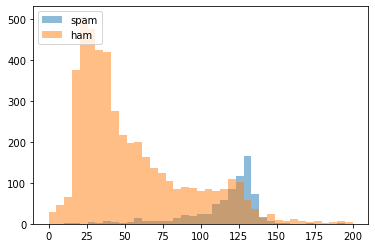

In [109]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.5, label='spam')
pyplot.hist(data[data['label']=='ham']['body_len'], bins, alpha=0.5, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()
 #Not accurate as the 'normed' is not working as a parameter

### Feature Engineering: Transformation

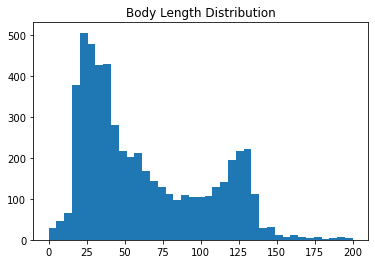

In [113]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data['body_len'], bins)

pyplot.title('Body Length Distribution')
pyplot.show()
#Bimodal distribution

### For punctuation

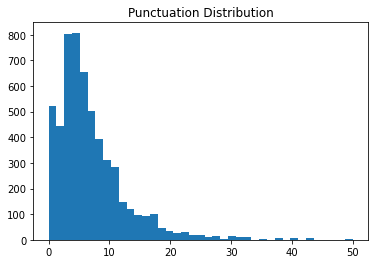

In [115]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data['punc%'], bins)

pyplot.title('Punctuation Distribution')
pyplot.show()
#Bimodal distribution

In [116]:
#It looks like a good distribution for transformation because it is skewed. If not transformed, the model can be biased.

### Box-Cox Power Transformation

**Base Form**: $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |


**Process**
1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

## Applying transformation on the punc column

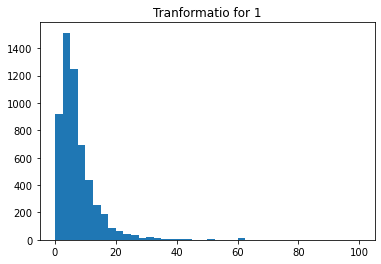

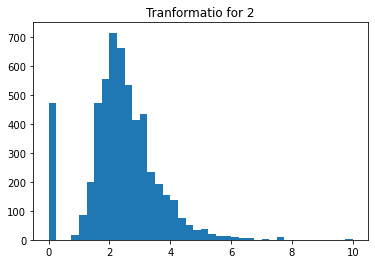

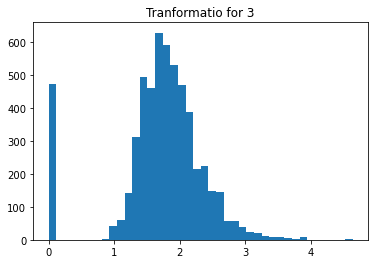

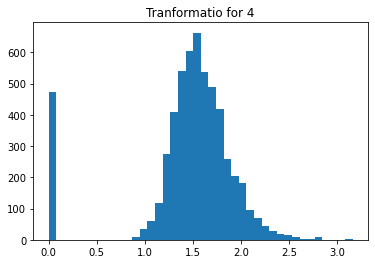

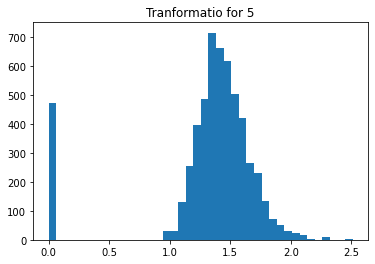

In [117]:
for i in[1,2,3,4,5]:
    pyplot.hist((data['punc%'])**(1/i), bins=40)
    pyplot.title(f'Tranformatio for {str(i)}')       #changing integer into str
    pyplot.show()

### Transofrmation for 4 and 5 is looking good

# Building Machine Learning Classifiers: Building a basic Random Forest model

### Read in & clean text

In [123]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Explore RandomForestClassifier Attributes & Hyperparameters

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
print(dir(RandomForestClassifier))
print(RandomForestClassifier())

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_set_oob_score', '_validate_X_predict', '_validate_data', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']
RandomForestClassifier()


### Explore RandomForestClassifier through Cross-Validation

In [120]:
from sklearn.model_selection import KFold, cross_val_score

In [130]:
rf=RandomForestClassifier(n_jobs=-1)  

k_fold=KFold(n_splits=5) 

cross_val_score(rf, X_features, data['label'], cv= k_fold, scoring='accuracy', n_jobs=-1)  

array([0.97486535, 0.97845601, 0.97304582, 0.96585804, 0.97304582])

In [131]:
#njob is wide in scope but it will generate trees faster
#number of splits, for instance how many divisions. 5 subsets. Iteration over each 5 subsets
#Scikit learn ask to separate the x_features and data[]

In [132]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split




In [133]:
x_train,x_test,y_train, y_test= train_test_split(X_features, data['label'], test_size=0.2)   #This will create 4 data sets so we need to store it into 4 variables

## Now we can fir out model

In [142]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1) 

rf_model= rf.fit(x_train, y_train)

In [143]:
# rf_model.feature_importances_    #Since no columns, so add some columns names

In [144]:
sorted(zip(rf_model.feature_importances_, x_train.columns), reverse=True)  

#The zip column will combine the features. Sorted will bring the most important features to the top

[(0.05299923711561386, 'body_len'),
 (0.03624735090869109, 4796),
 (0.029826467093286402, 3134),
 (0.028573169773943738, 5724),
 (0.02754245772712125, 1803),
 (0.027050038889551046, 2031),
 (0.02689951159328883, 7350),
 (0.021292855642751594, 5988),
 (0.017143077073787004, 6746),
 (0.01650839800688136, 5078),
 (0.015521329988289811, 7461),
 (0.01445056527398803, 690),
 (0.01316959287295451, 6971),
 (0.01237192045848382, 7027),
 (0.011799274630697907, 295),
 (0.011695021044877171, 7218),
 (0.010666230844523717, 2095),
 (0.010594956937643153, 354),
 (0.010352210203283516, 6050),
 (0.010217697605640372, 5287),
 (0.010206930125056643, 1361),
 (0.009995556552161278, 873),
 (0.00948918970412232, 2299),
 (0.009353366938095393, 397),
 (0.009006078805030184, 7782),
 (0.008590027140328587, 7543),
 (0.0085625150244683, 2081),
 (0.0084462830522429, 392),
 (0.008310639647554036, 'punct%'),
 (0.008066378649031768, 3443),
 (0.007364503892984431, 1941),
 (0.007297285248770403, 5005),
 (0.0071523654011

In [145]:
#Body_len is the most important feature

### Prediction

In [149]:
y_pred= rf_model.predict(x_test)

precision, recall, fscore, support= score(y_test, y_pred, pos_label='spam', average='binary')

print('Precision:{} / Recall:{} / Accuracy: {}'. format(precision, recall, (y_pred==y_test).sum() / len(y_pred)))

Precision:1.0 / Recall:0.5915492957746479 / Accuracy: 0.947935368043088


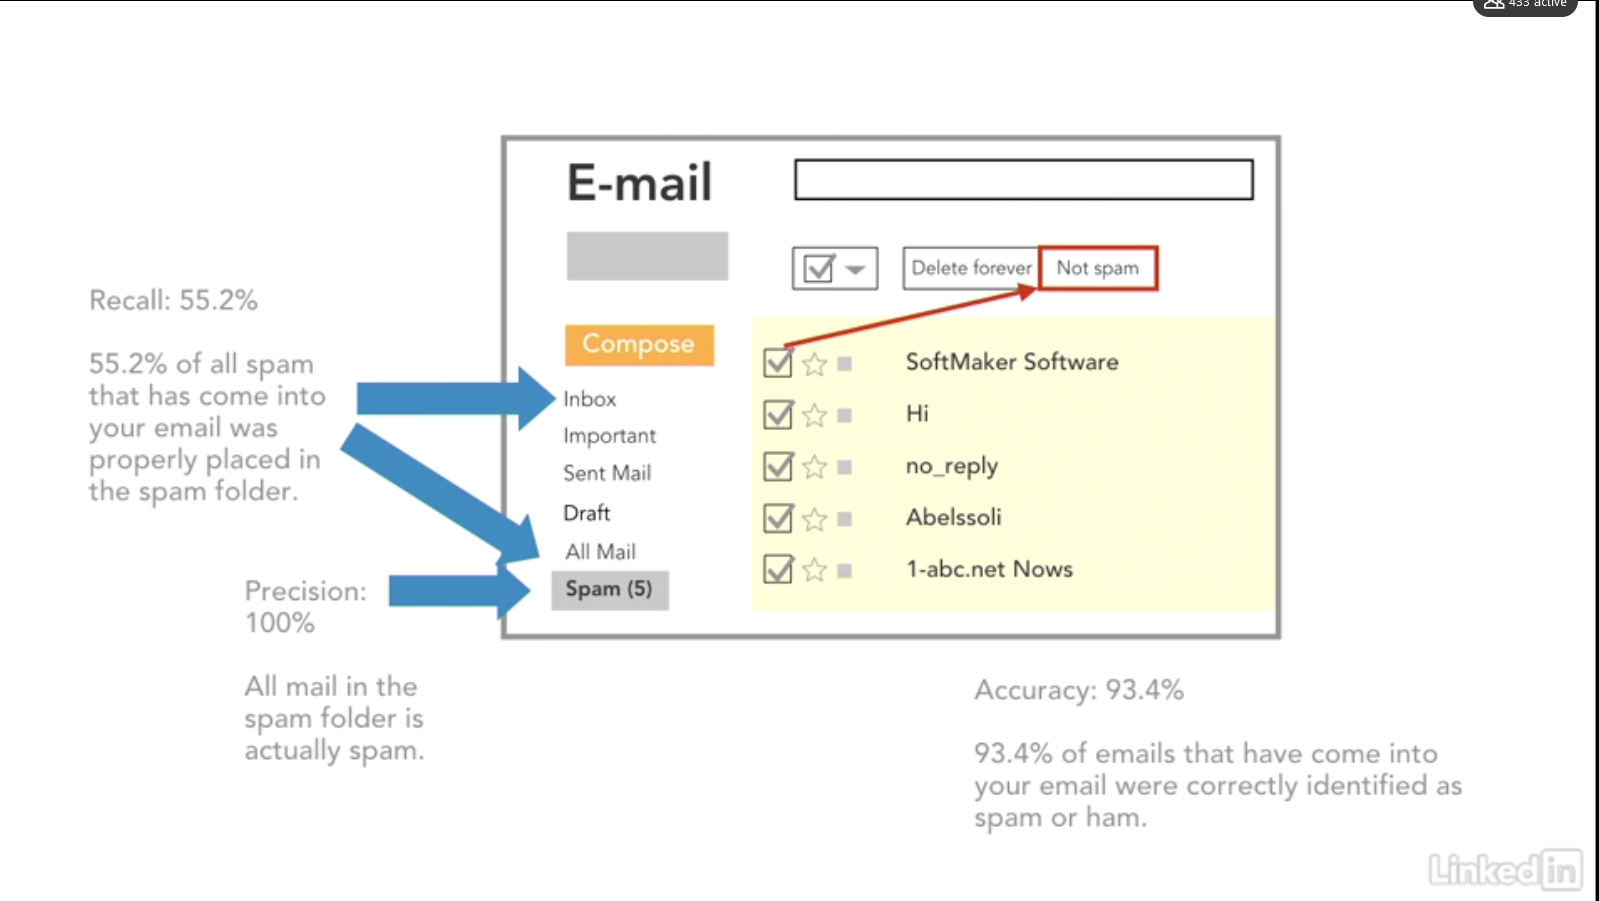

# Building Machine Learning Classifiers: Explore Random Forest model with grid-search

**Grid-search:** Exhaustively search all parameter combinations in a given grid to determine the best model.

## Build our own Grid search

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [151]:
x_train,x_test,y_train, y_test= train_test_split(X_features, data['label'], test_size=0.2)

In [152]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(x_train, y_train)
    y_pred = rf_model.predict(x_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

In [153]:
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Precision: 1.0 / Recall: 0.148 / Accuracy: 0.886
Est: 10 / Depth: 20 ---- Precision: 1.0 / Recall: 0.537 / Accuracy: 0.938
Est: 10 / Depth: 30 ---- Precision: 1.0 / Recall: 0.772 / Accuracy: 0.969
Est: 10 / Depth: None ---- Precision: 0.976 / Recall: 0.805 / Accuracy: 0.971
Est: 50 / Depth: 10 ---- Precision: 1.0 / Recall: 0.262 / Accuracy: 0.901
Est: 50 / Depth: 20 ---- Precision: 1.0 / Recall: 0.611 / Accuracy: 0.948
Est: 50 / Depth: 30 ---- Precision: 1.0 / Recall: 0.785 / Accuracy: 0.971
Est: 50 / Depth: None ---- Precision: 1.0 / Recall: 0.866 / Accuracy: 0.982
Est: 100 / Depth: 10 ---- Precision: 1.0 / Recall: 0.255 / Accuracy: 0.9
Est: 100 / Depth: 20 ---- Precision: 1.0 / Recall: 0.617 / Accuracy: 0.949
Est: 100 / Depth: 30 ---- Precision: 0.982 / Recall: 0.752 / Accuracy: 0.965
Est: 100 / Depth: None ---- Precision: 0.992 / Recall: 0.839 / Accuracy: 0.978


# Building Machine Learning Classifiers: Evaluate Random Forest with GridSearchCV

**Grid-search:** Exhaustively search all parameter combinations in a given grid to determine the best model.

**Cross-validation:** Divide a dataset into k subsets and repeat the holdout method k times where a different subset is used as the holdout set in each iteration.

In [154]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

# TF-IDF
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_tfidf_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

# CountVectorizer
count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data['body_text'])
X_count_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_count.toarray())], axis=1)

X_count_feat.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,49,4.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,62,3.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28,7.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,135,4.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Exploring parameter settings using GridSearchCV

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [156]:
rf= RandomForestClassifier()
param= {'n_estimators': [10, 150, 300],
       'max_depth': [30,60,90,None]}

gs= GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit= gs.fit(X_tfidf_feat,data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

c:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.96101887 0.97269498 0.97233543 0.97233624
 0.97287435 0.97305453 0.97467098 0.96730608 0.97413173 0.97341328]
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,84.435676,2.969181,1.441789,0.257263,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.978456,0.977558,0.976640,0.968553,0.972147,0.974671,0.003751,1
10,48.080498,3.918210,0.753346,0.183499,None,150,"{'max_depth': None, 'n_estimators': 150}",0.978456,0.978456,0.976640,0.968553,0.968553,0.974132,0.004603,2
11,85.875300,1.595047,0.761279,0.286883,None,300,"{'max_depth': None, 'n_estimators': 300}",0.978456,0.976661,0.974843,0.967655,0.969452,0.973413,0.004168,3
7,44.622952,3.002680,1.051201,0.080879,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.977558,0.973968,0.974843,0.967655,0.971249,0.973055,0.003368,4
6,9.398969,1.877470,0.720820,0.259151,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.974865,0.979354,0.973046,0.964061,0.973046,0.972874,0.004973,5


In [157]:
rf= RandomForestClassifier()
param= {'n_estimators': [10, 150, 300],
       'max_depth': [30,60,90,None]}

gs= GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit= gs.fit(X_count_feat,data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,54.249065,5.083479,1.413487,0.603758,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.980251,0.973070,0.973944,0.967655,0.973944,0.973773,0.003999,1
10,57.142804,1.062016,1.422236,0.549862,None,150,"{'max_depth': None, 'n_estimators': 150}",0.977558,0.973968,0.973046,0.967655,0.973046,0.973055,0.003171,2
8,106.320027,1.949351,1.943942,0.466085,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.976661,0.975763,0.973944,0.966757,0.971249,0.972875,0.003575,3
6,9.915935,0.764311,0.623331,0.176640,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.973070,0.975763,0.973944,0.970350,0.967655,0.972157,0.002848,4
11,89.686452,1.117821,0.738775,0.211841,None,300,"{'max_depth': None, 'n_estimators': 300}",0.977558,0.972172,0.973046,0.967655,0.969452,0.971977,0.003388,5


### These results show that the more the max_depth, the better the performance of our model will be.

### Mean fit time is less for less number of estimators

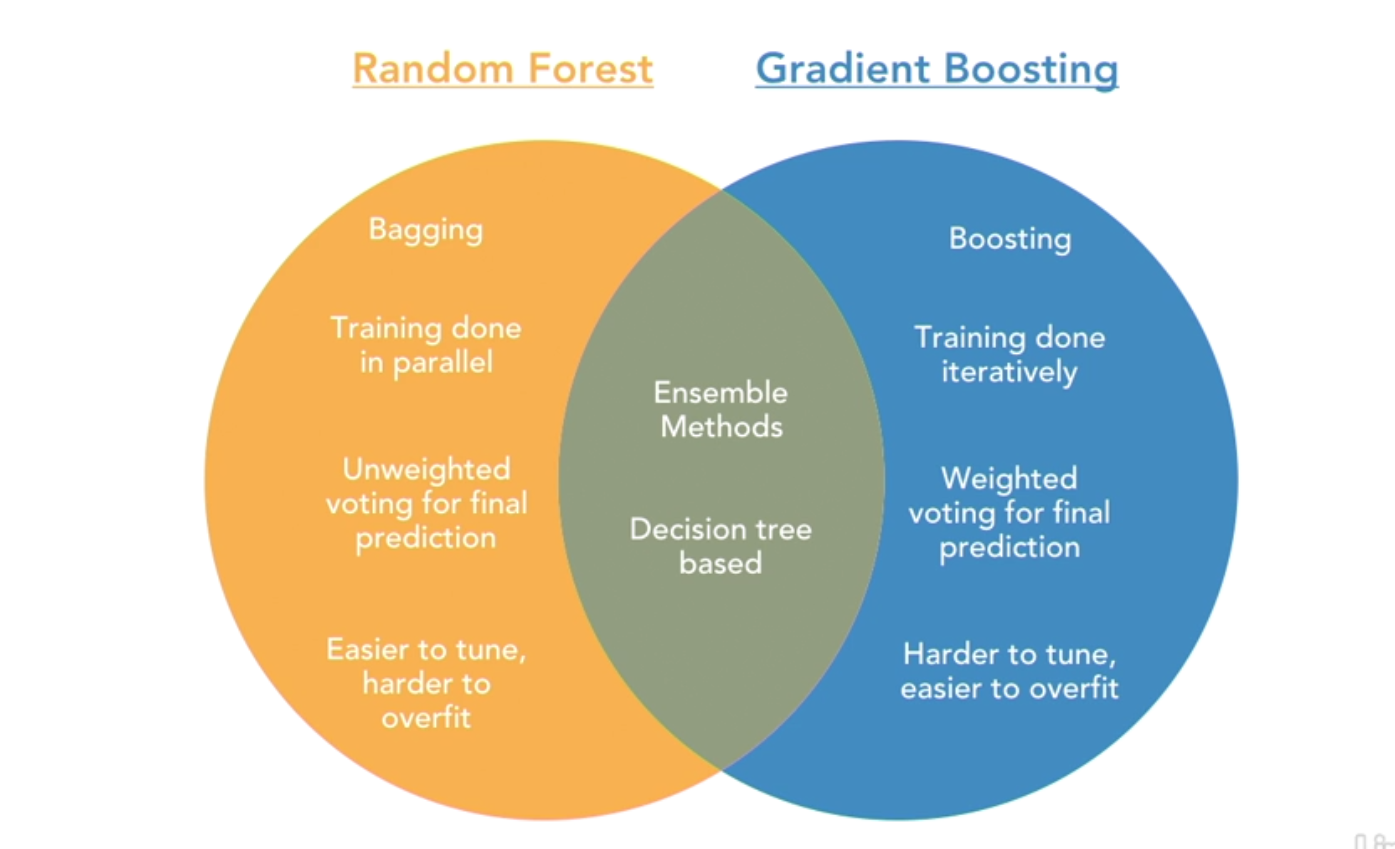

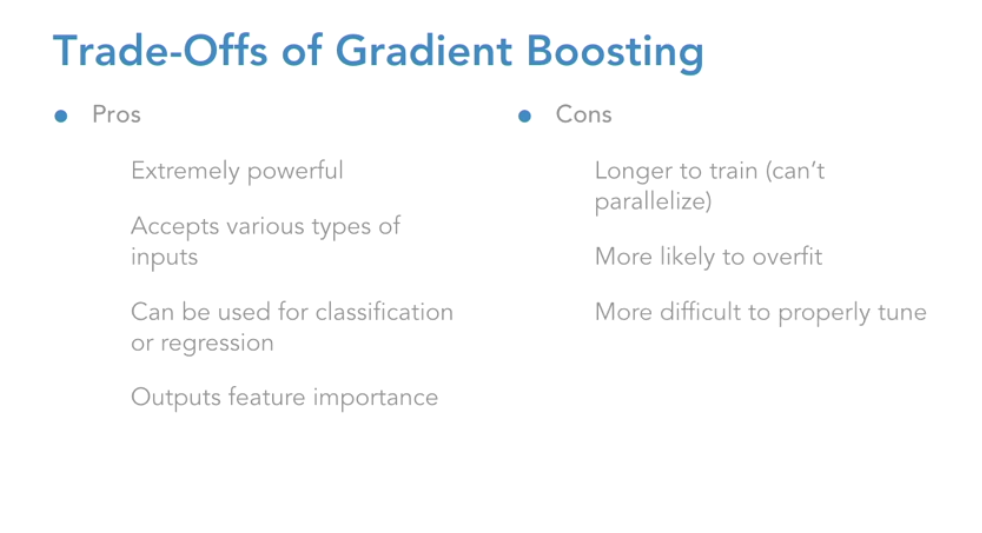

### Through Gradient Boosting:

In [158]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [160]:
def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators=est, max_depth=max_depth, learning_rate=lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} / LR: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        est, max_depth, lr, round(precision, 3), round(recall, 3), 
        round((y_pred==y_test).sum()/len(y_pred), 3)))

In [161]:
# for n_est in [50, 100, 150]:
#     for max_depth in [3, 7, 11, 15]:
#         for lr in [0.01, 0.1, 1]:
#             train_GB(n_est, max_depth, lr)

#By running this, it can take an hour, so directly pasting the results in an image form

# Building Machine Learning Classifiers: Evaluate Gradient Boosting with GridSearchCV

### AS it also takes 2 hours to run, so I will just past the results for reference:


In [162]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [163]:
# gb = GradientBoostingClassifier()
# param = {
#     'n_estimators': [100, 150], 
#     'max_depth': [7, 11, 15],
#     'learning_rate': [0.1]
# }

# clf = GridSearchCV(gb, param, cv=5, n_jobs=-1)
# cv_fit = clf.fit(X_tfidf_feat, data['label'])
# pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

In [164]:
# gb = GradientBoostingClassifier()
# param = {
#     'n_estimators': [100, 150], 
#     'max_depth': [7, 11, 15],
#     'learning_rate': [0.1]
# }

# clf = GridSearchCV(gb, param, cv=5, n_jobs=-1)
# cv_fit = clf.fit(X_count_feat, data['label'])
# pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

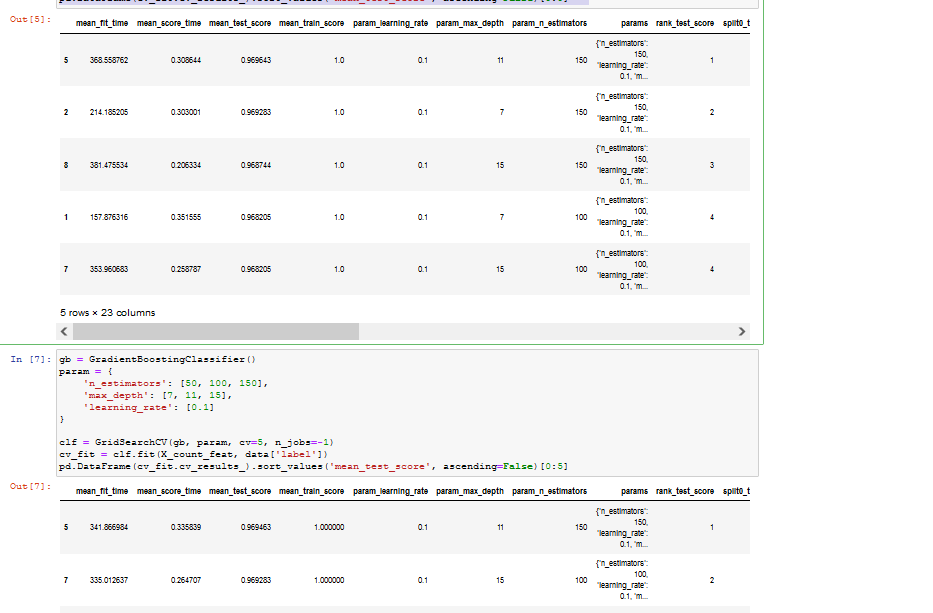